In [9]:
!pip3 install matplotlib

  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.4 MB/s eta 0:00:00
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)


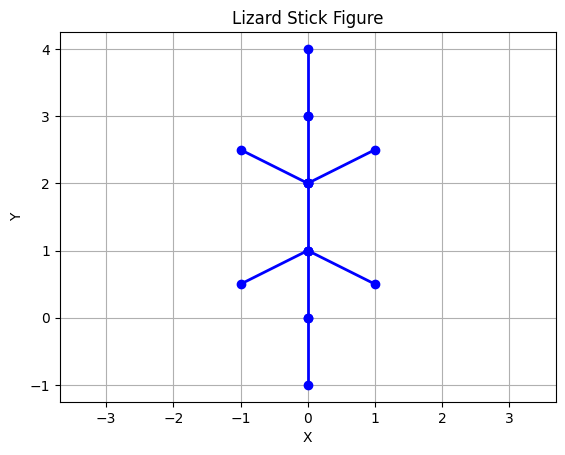

In [8]:
import matplotlib.pyplot as plt

points = {
    1: (0, 3), 
    2: (0, 4), 
    3: (0, 2), 
    4: (0, 1), 
    5: (0, 0), 
    6: (-1, 2.5), 
    7: (1, 2.5),  
    8: (-1, 0.5), 
    9: (1, 0.5),  
    10: (0, -1),  
}

edges = [
    (1, 2), 
    (1, 3), 
    (3, 4), 
    (4, 5), 
    (3, 6), 
    (3, 7), 
    (4, 8), 
    (4, 9), 
    (5, 10),
]

for edge in edges:
    x_values = [points[edge[0]][0], points[edge[1]][0]]
    y_values = [points[edge[0]][1], points[edge[1]][1]]
    plt.plot(x_values, y_values, 'bo-', linewidth=2)

plt.title('Lizard Stick Figure')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()


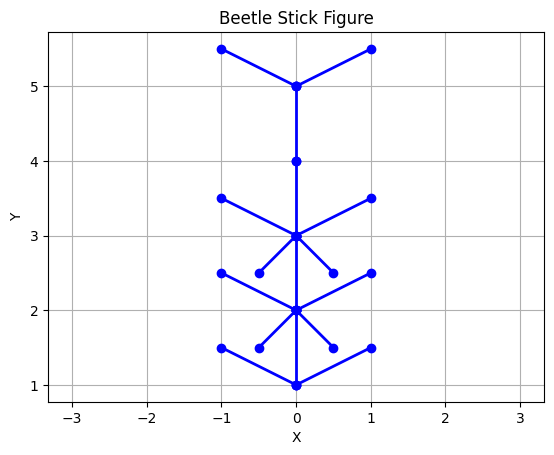

In [10]:
import matplotlib.pyplot as plt

points = {
    1: (0, 4),  
    2: (0, 5),  
    3: (-1, 5.5), 
    4: (1, 5.5),  
    5: (0, 3),  
    6: (0, 2),  
    7: (0, 1),  
    8: (-1, 3.5), 
    9: (1, 3.5),  
    10: (-1, 2.5),
    11: (1, 2.5), 
    12: (-1, 1.5),
    13: (1, 1.5), 
    14: (-0.5, 2.5),
    15: (0.5, 2.5), 
    16: (-0.5, 1.5),
    17: (0.5, 1.5),
}


edges = [
    (1, 2), 
    (2, 3), 
    (2, 4), 
    (1, 5), 
    (5, 6),
    (6, 7), 
    (5, 8),
    (5, 9),
    (6, 10),
    (6, 11),
    (7, 12),
    (7, 13),
    (5, 14),
    (5, 15),
    (6, 16),
    (6, 17),
]

# Plot the stick figure
for edge in edges:
    x_values = [points[edge[0]][0], points[edge[1]][0]]
    y_values = [points[edge[0]][1], points[edge[1]][1]]
    plt.plot(x_values, y_values, 'bo-', linewidth=2)

plt.title('Beetle Stick Figure')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()


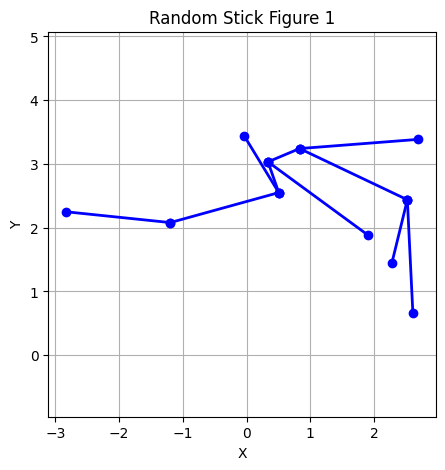

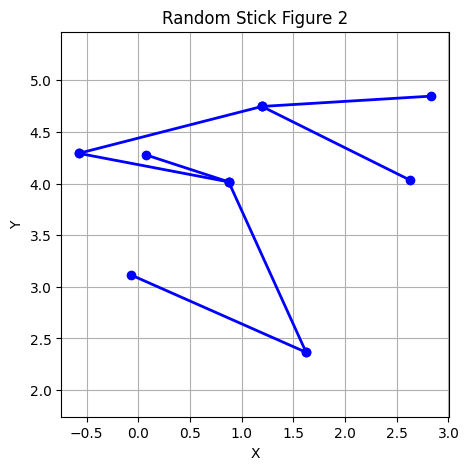

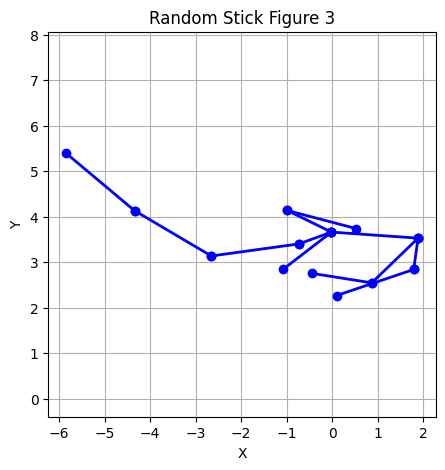

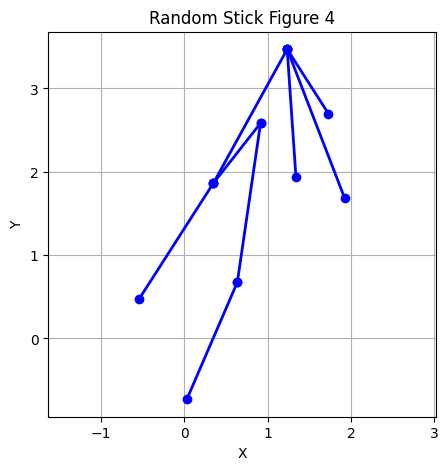

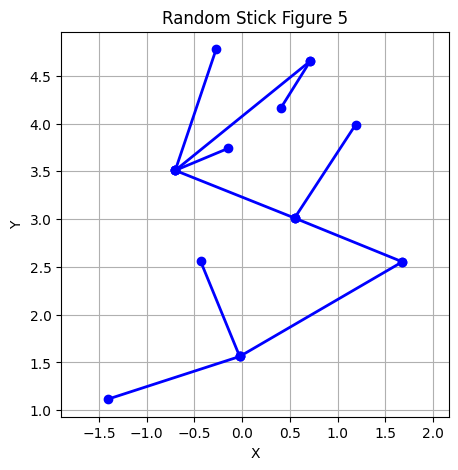

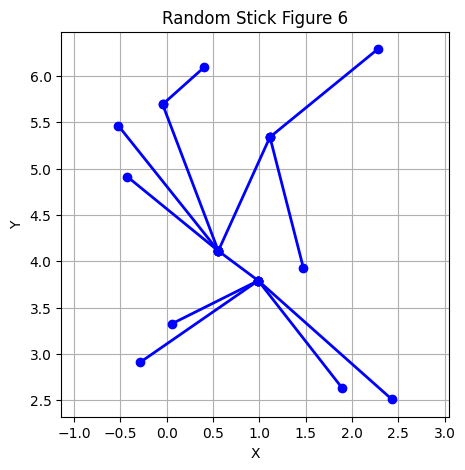

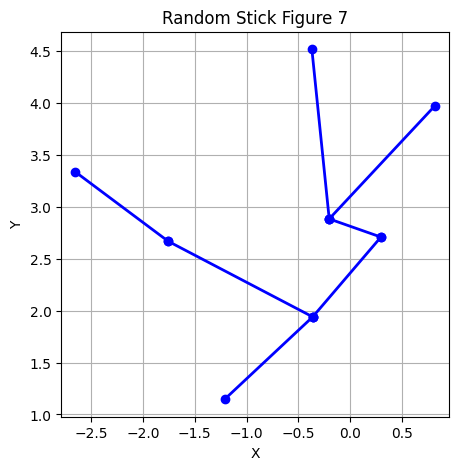

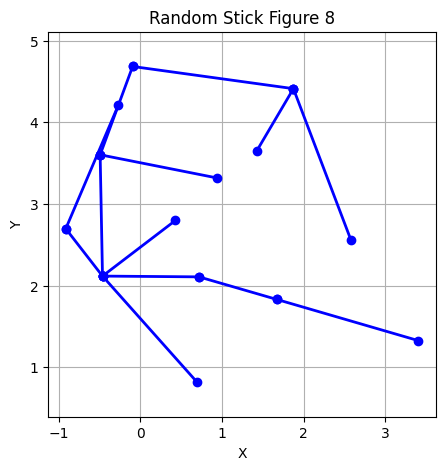

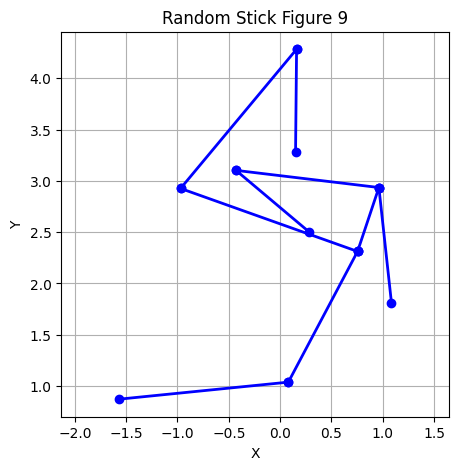

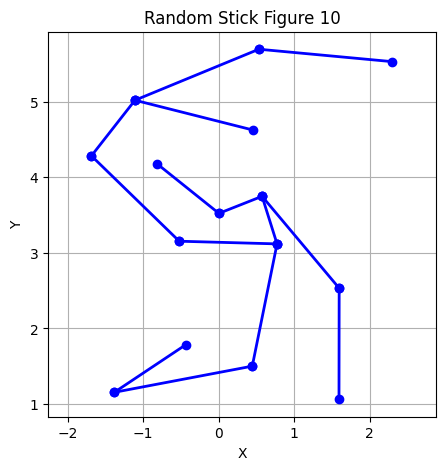

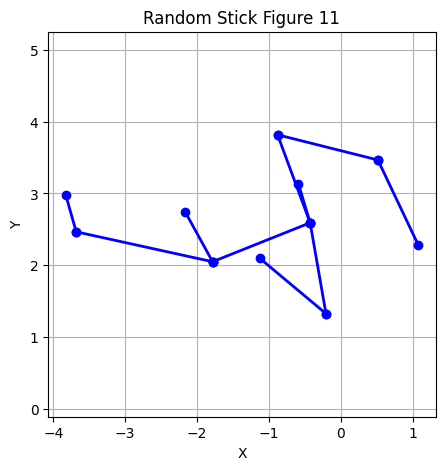

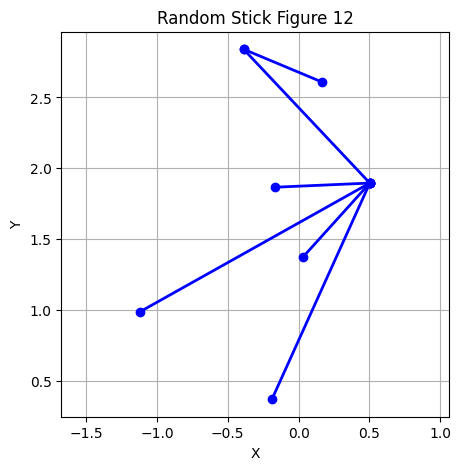

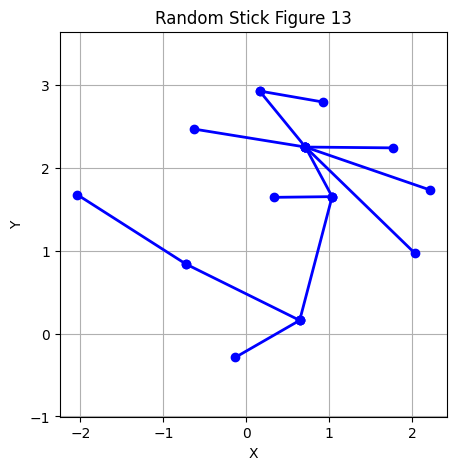

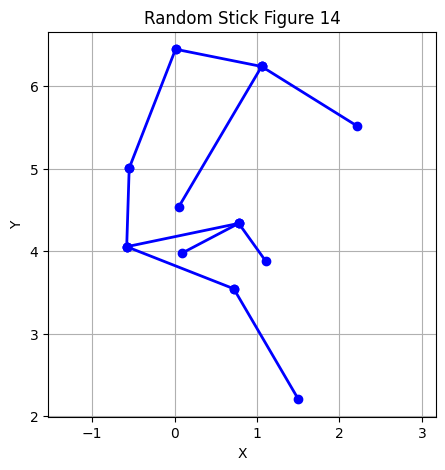

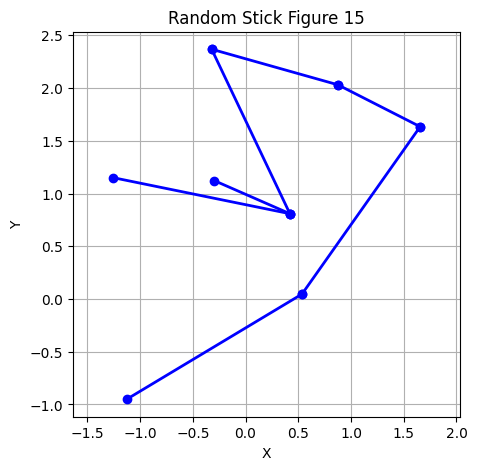

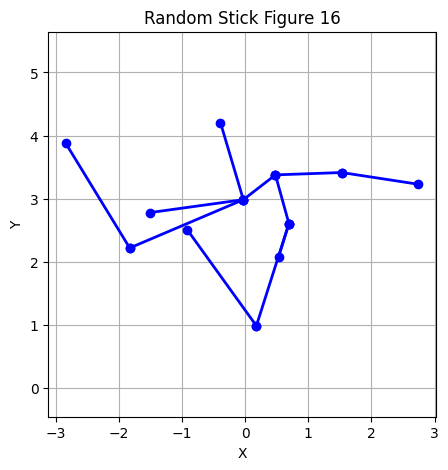

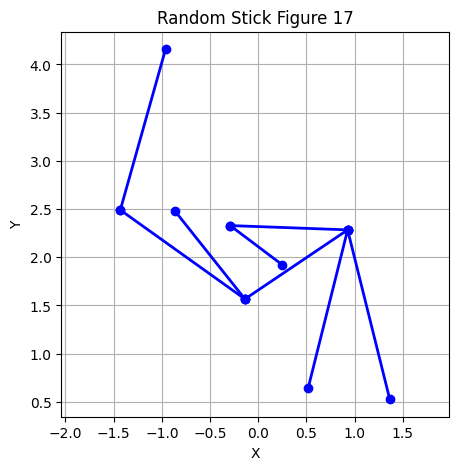

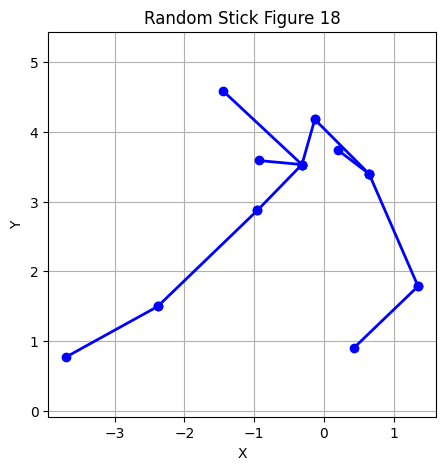

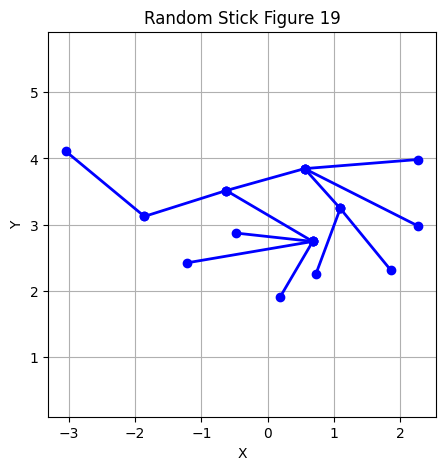

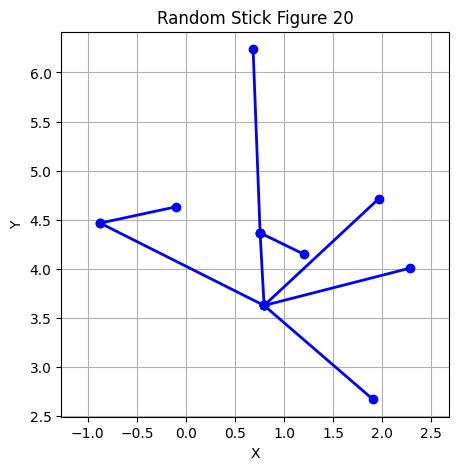

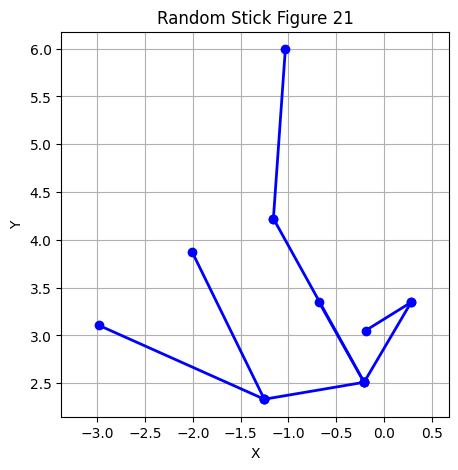

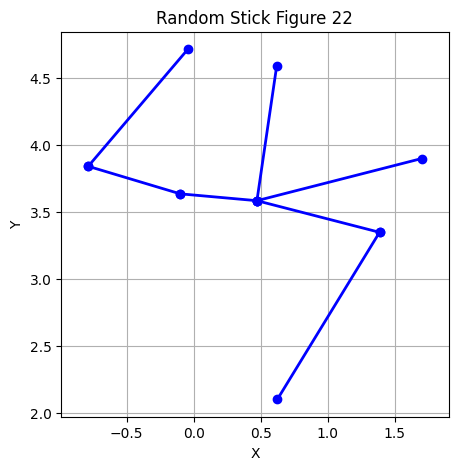

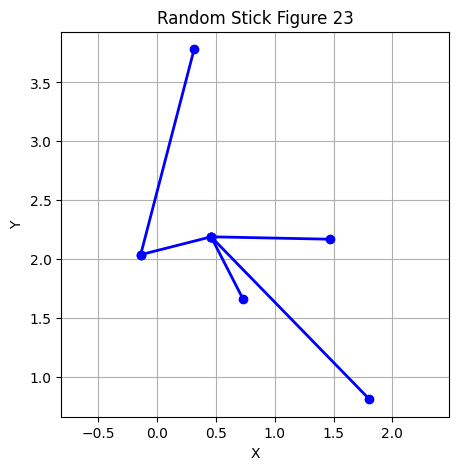

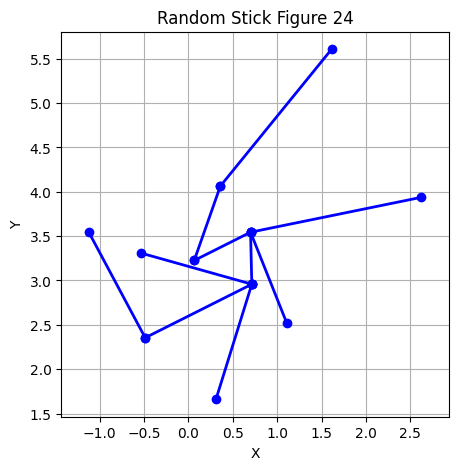

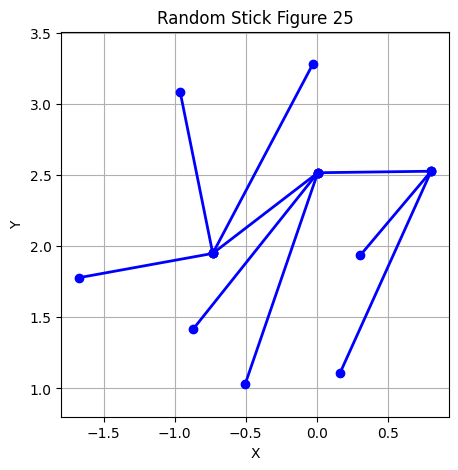

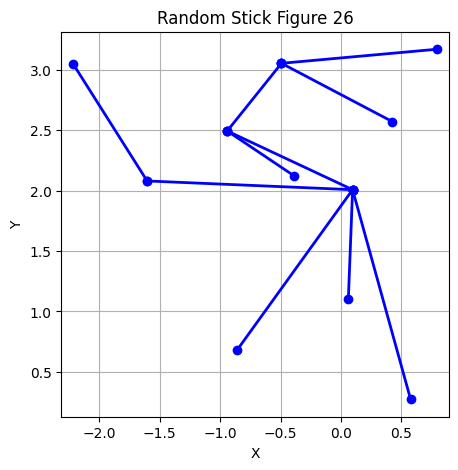

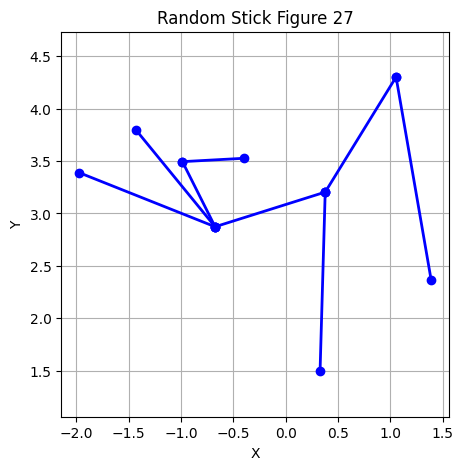

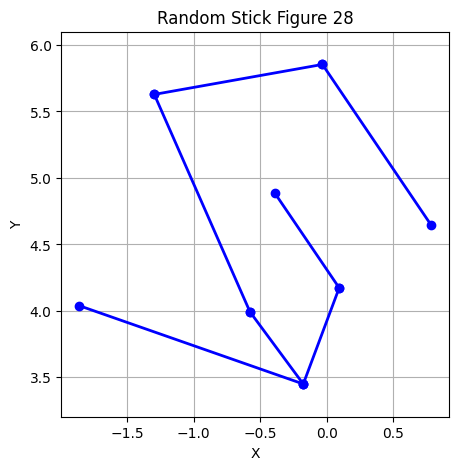

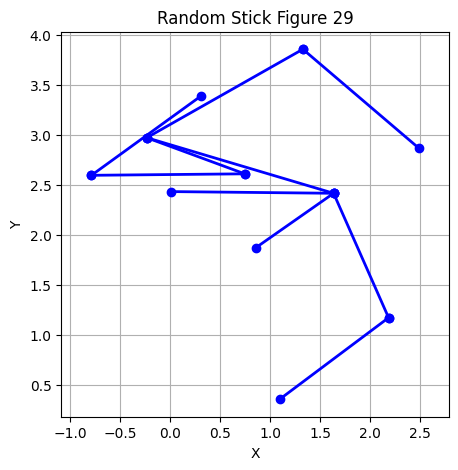

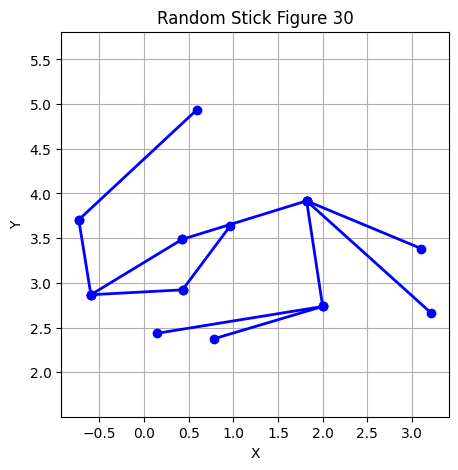

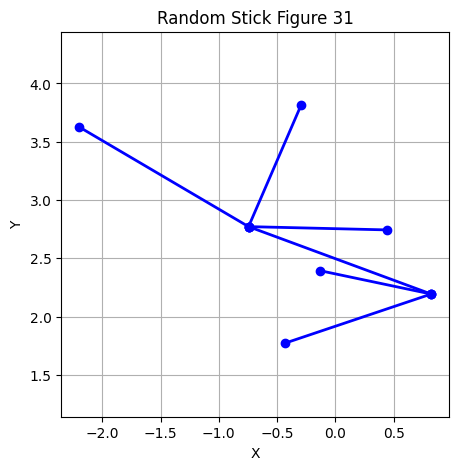

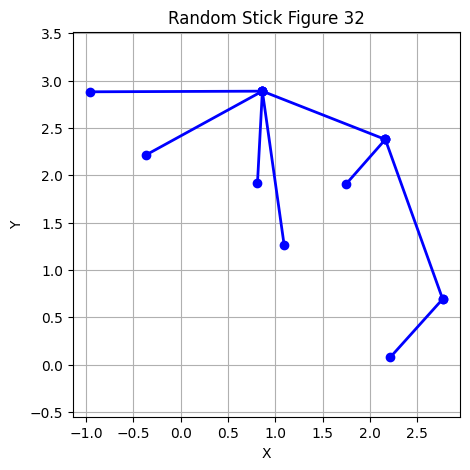

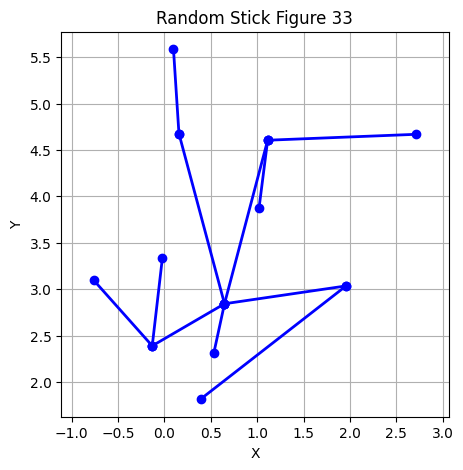

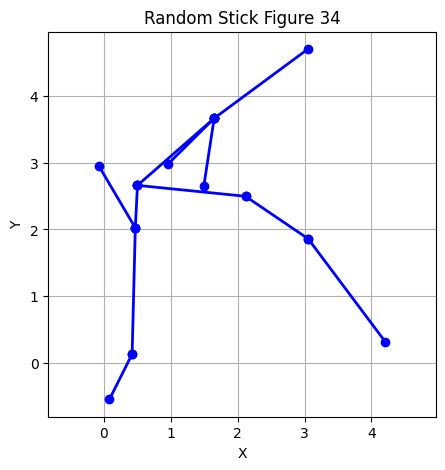

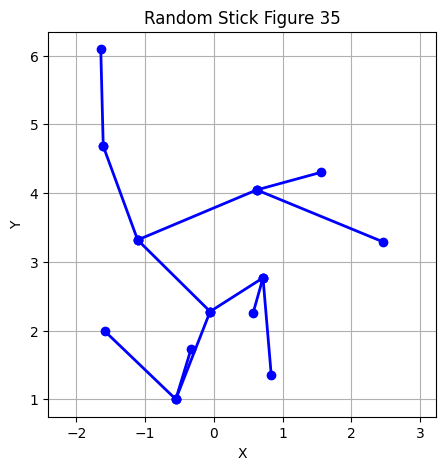

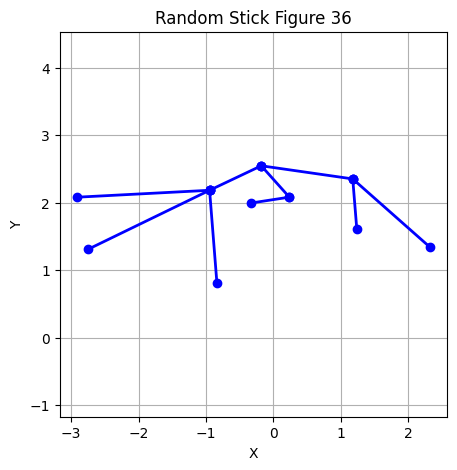

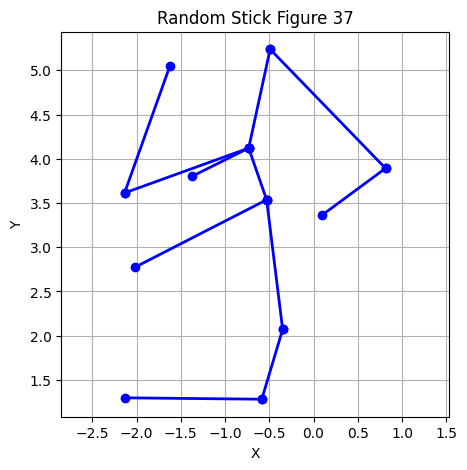

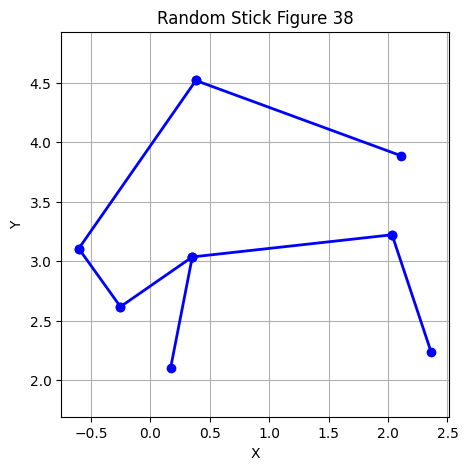

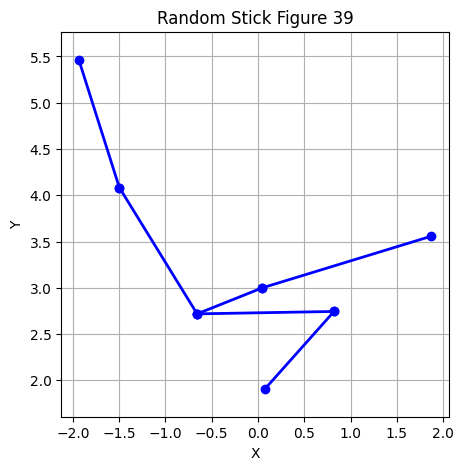

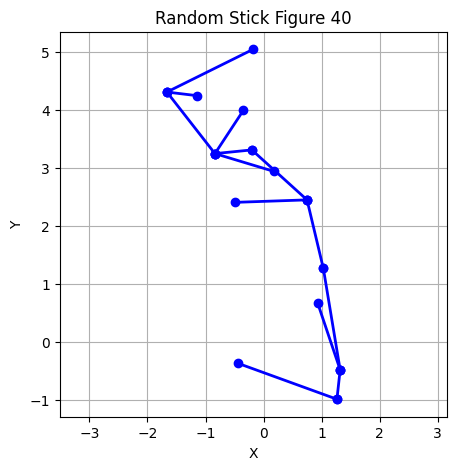

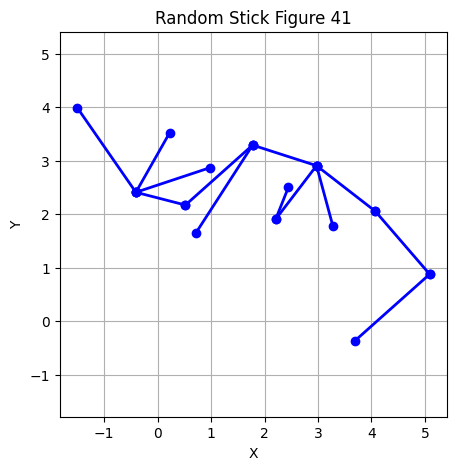

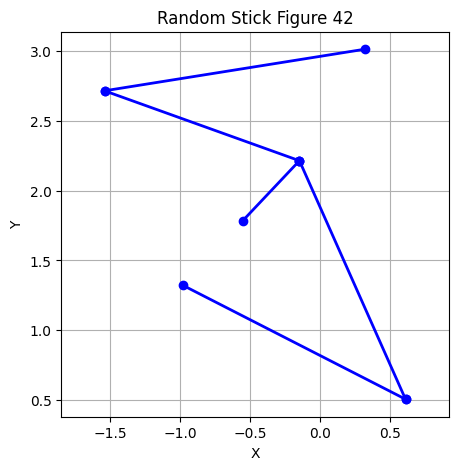

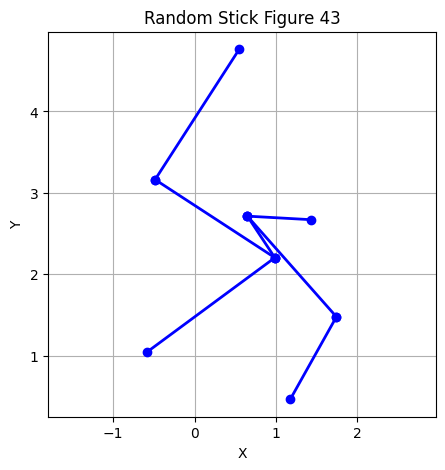

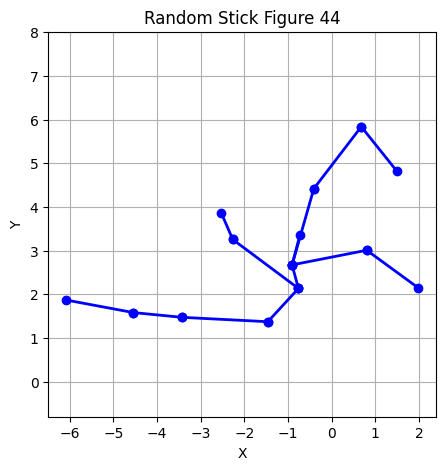

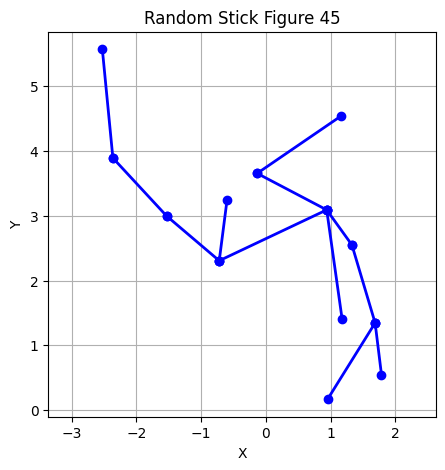

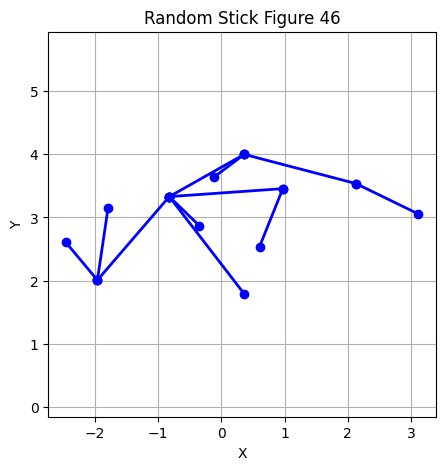

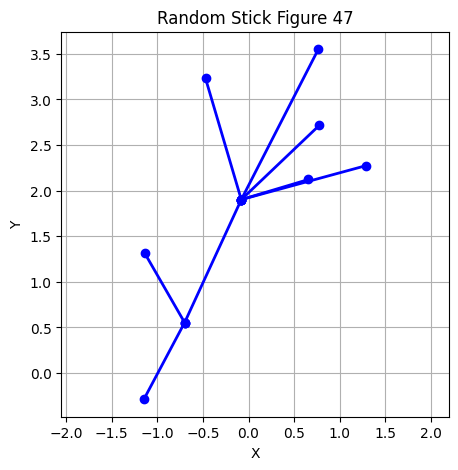

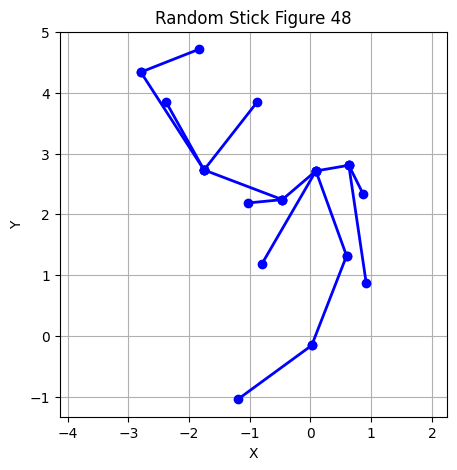

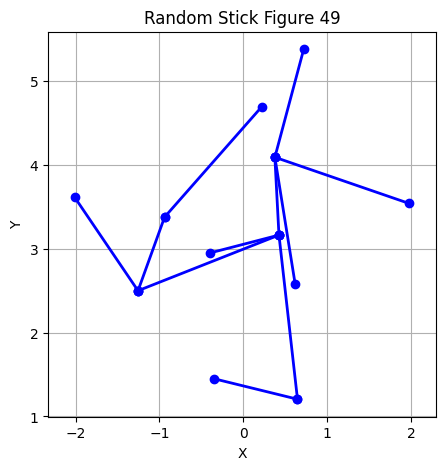

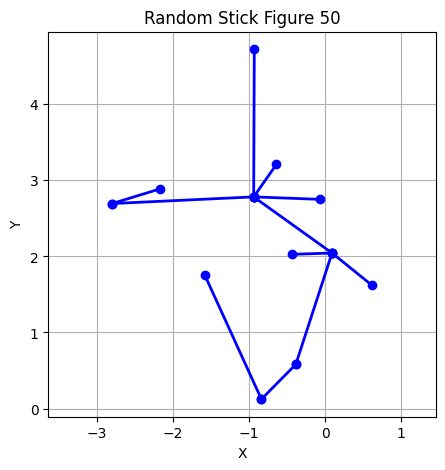

In [1]:
import matplotlib.pyplot as plt
import random

def generate_random_point(x_range, y_range):
    return (random.uniform(*x_range), random.uniform(*y_range))

def is_valid_placement(new_point, points, min_distance=0.5):
    """Ensure that the new point does not overlap or come too close to existing points."""
    for point in points.values():
        if ((new_point[0] - point[0])**2 + (new_point[1] - point[1])**2) < min_distance**2:
            return False
    return True

def do_lines_intersect(p1, p2, p3, p4):
    """Check if two lines (p1-p2 and p3-p4) intersect."""
    def ccw(A, B, C):
        return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

    return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

def is_valid_edge(new_edge, points, edges, min_edge_length=0.5, max_edge_length=2.0):
    """Ensure that the new edge does not intersect existing edges and adheres to edge length constraints."""
    if new_edge[0] not in points or new_edge[1] not in points:
        return False
    p1, p2 = points[new_edge[0]], points[new_edge[1]]
    edge_length = ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2) ** 0.5
    if not (min_edge_length <= edge_length <= max_edge_length):
        return False
    for edge in edges:
        if do_lines_intersect(p1, p2, points[edge[0]], points[edge[1]]):
            return False
    return True

def generate_random_stick_figure(min_edge_length=0.5, max_edge_length=2.0):
    num_segments = random.randint(3, 6)
    num_limbs = random.randint(4, 12)

    points = {}
    edges = []
    
    x, y = 0, random.uniform(3, 5)
    for i in range(1, num_segments + 1):
        valid_placement = False
        attempts = 0
        while not valid_placement and attempts < 10:
            candidate_x = x + random.uniform(-1, 1)
            candidate_y = y - random.uniform(0.5, 1.5)
            if is_valid_placement((candidate_x, candidate_y), points):
                points[i] = (candidate_x, candidate_y)
                if i > 1:
                    new_edge = (i - 1, i)
                    if is_valid_edge(new_edge, points, edges, min_edge_length, max_edge_length):
                        edges.append(new_edge)
                        valid_placement = True
                    else:
                        del points[i]
                else:
                    valid_placement = True
            attempts += 1
    
    if num_segments > 1:
        tail_tip = num_segments + 1
        tail_point = (x + random.uniform(-0.5, 0.5), y - 1)
        if is_valid_placement(tail_point, points) and is_valid_edge((num_segments, tail_tip), points, edges, min_edge_length, max_edge_length):
            points[tail_tip] = tail_point
            edges.append((num_segments, tail_tip))
            num_segments += 1

    for i in range(num_segments + 1, num_segments + 1 + num_limbs):
        valid_placement = False
        attempts = 0
        while not valid_placement and attempts < 10:
            attached_to = random.choice(list(points.keys()))
            x_pos = points[attached_to][0] + random.uniform(-2, 2)
            y_pos = points[attached_to][1] + random.uniform(-2, 2)
            limb_point = (x_pos, y_pos)
            new_edge = (attached_to, i)
            if is_valid_placement(limb_point, points):
                points[i] = limb_point
                if is_valid_edge(new_edge, points, edges, min_edge_length, max_edge_length):
                    edges.append(new_edge)
                    valid_placement = True
                else:
                    del points[i]
            attempts += 1

    return points, edges

def plot_stick_figure(points, edges, title='Random Stick Figure', index=1):
    plt.figure(figsize=(5, 5))
    for edge in edges:
        x_values = [points[edge[0]][0], points[edge[1]][0]]
        y_values = [points[edge[0]][1], points[edge[1]][1]]
        plt.plot(x_values, y_values, 'bo-', linewidth=2)

    plt.title(f'{title} {index}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

for i in range(1, 51):
    points, edges = generate_random_stick_figure(min_edge_length=0.5, max_edge_length=2.0)
    plot_stick_figure(points, edges, title='Random Stick Figure', index=i)


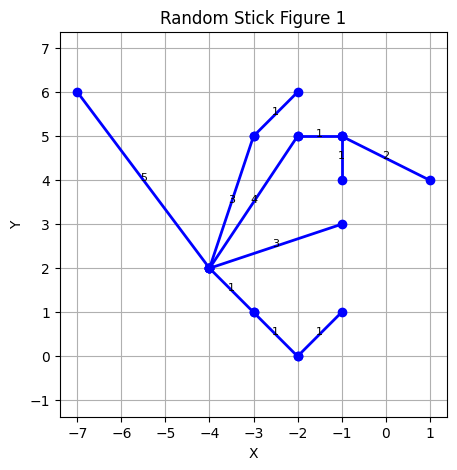

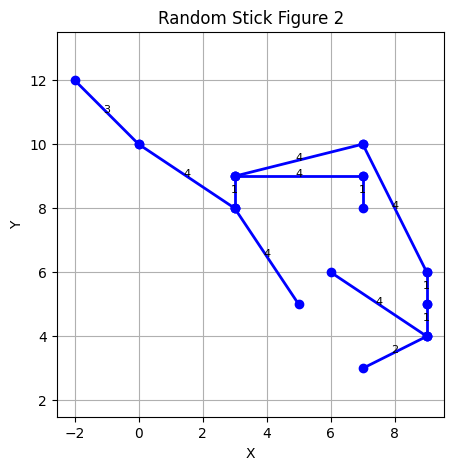

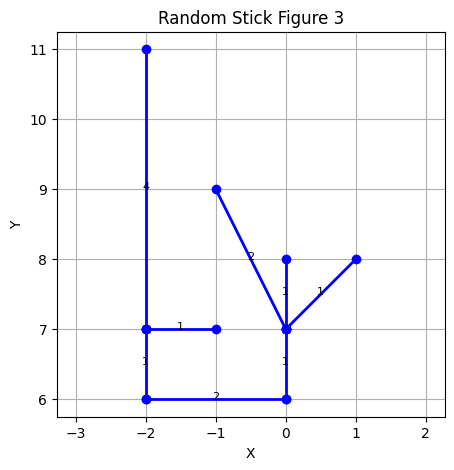

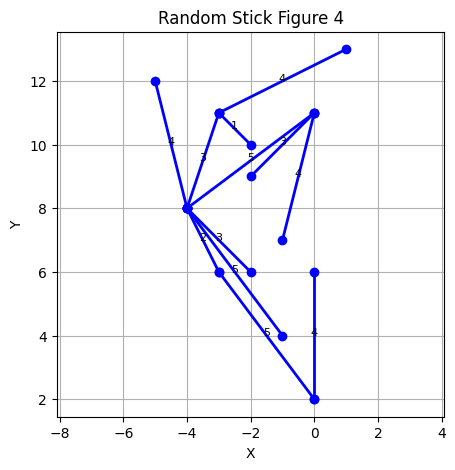

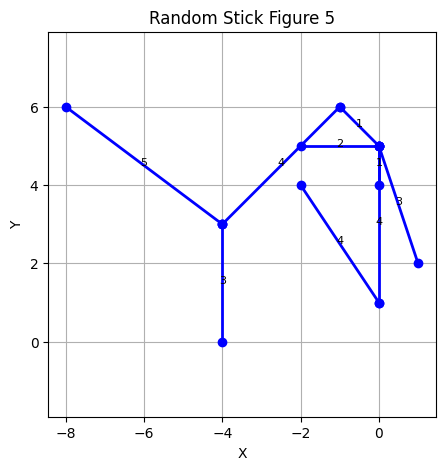

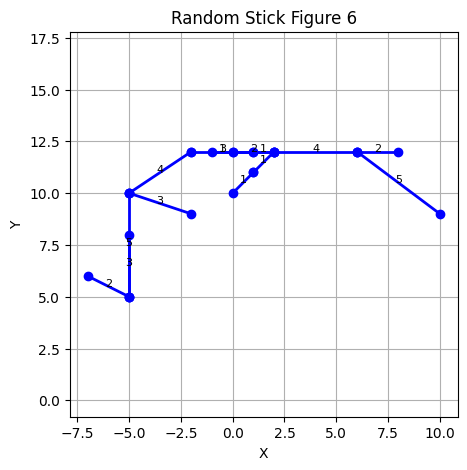

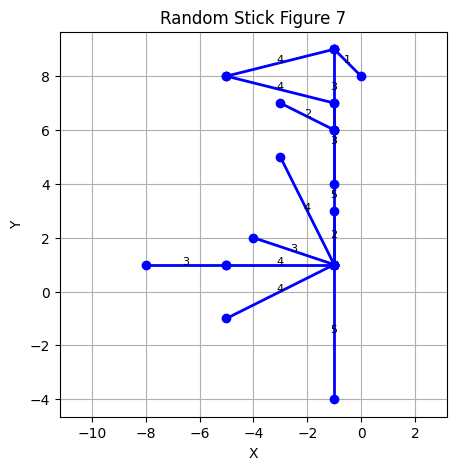

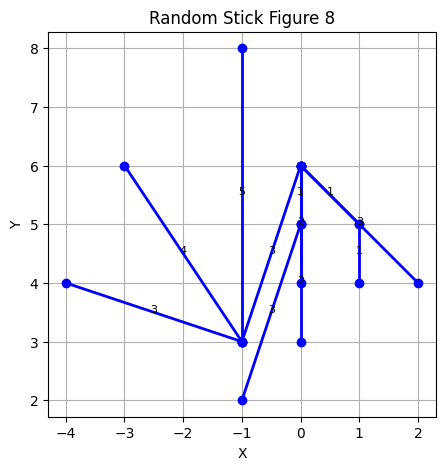

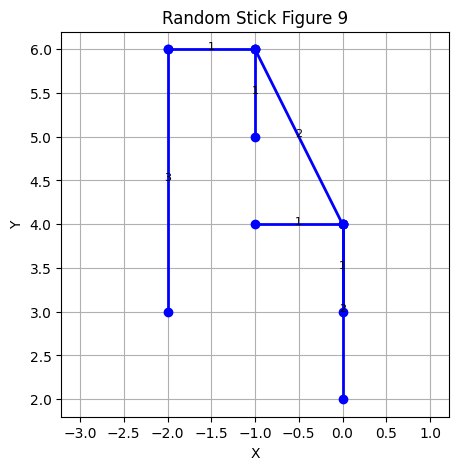

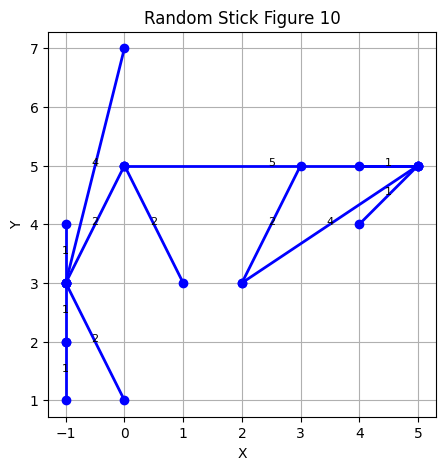

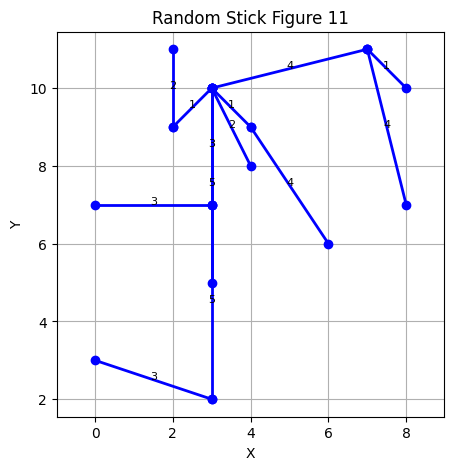

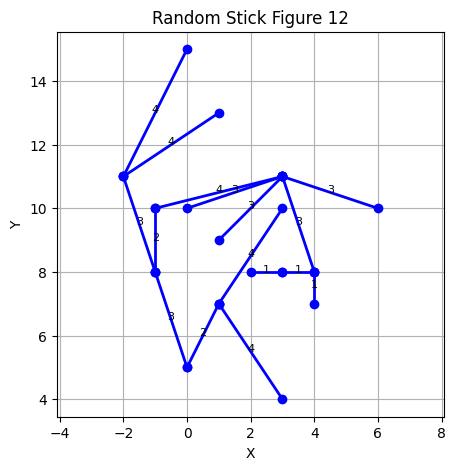

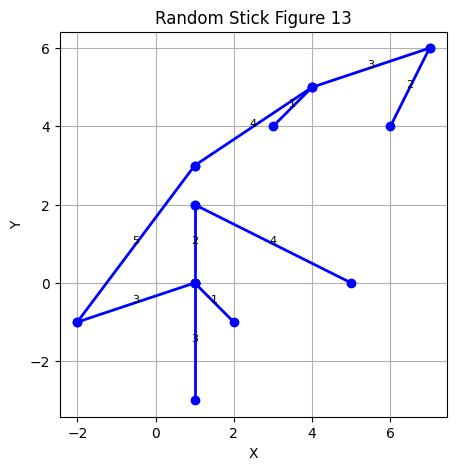

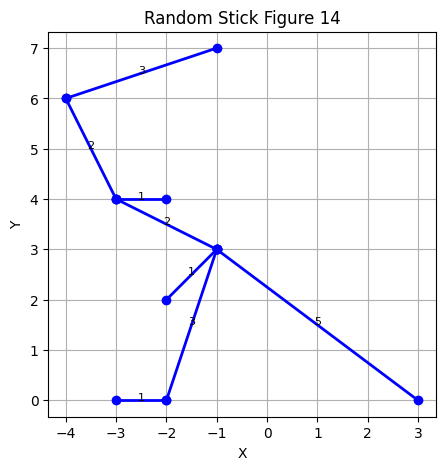

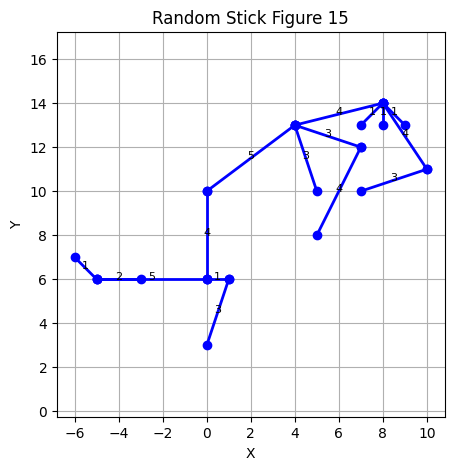

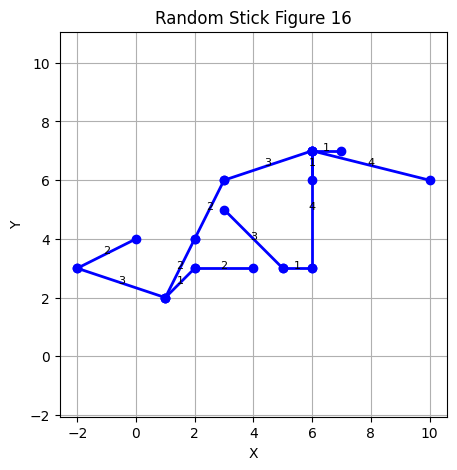

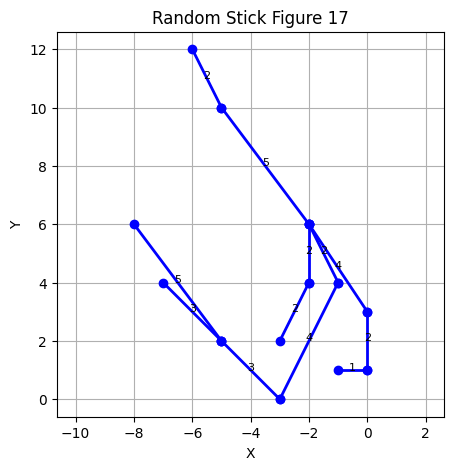

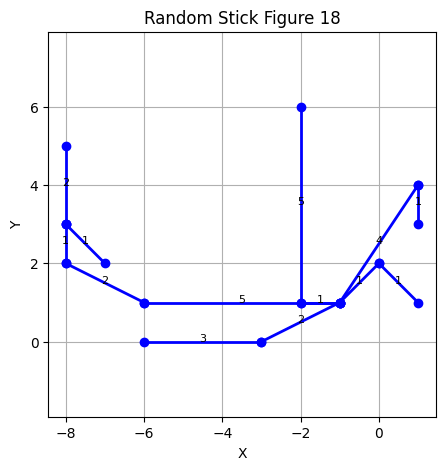

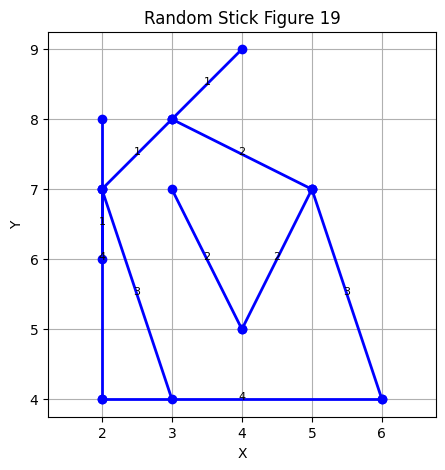

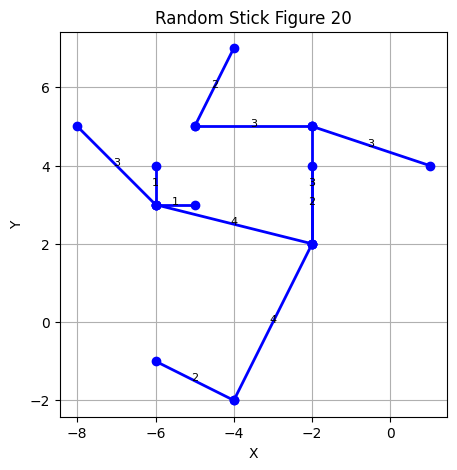

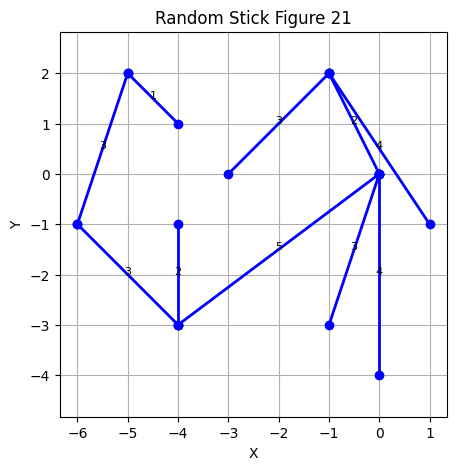

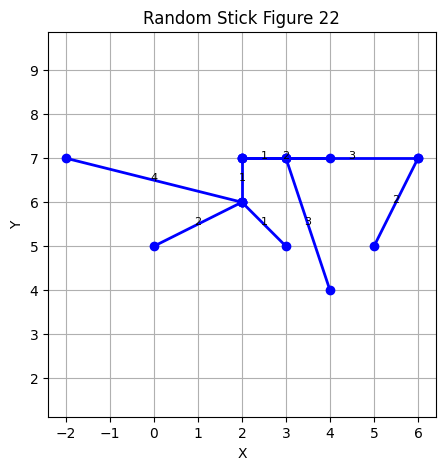

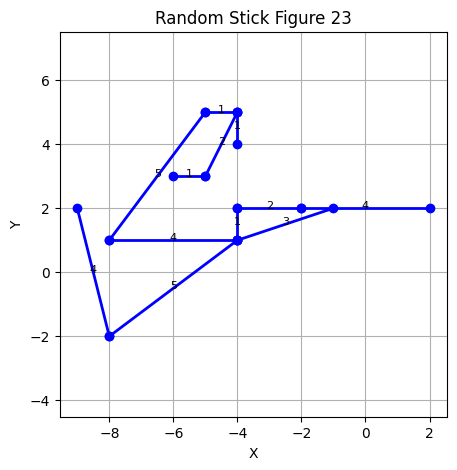

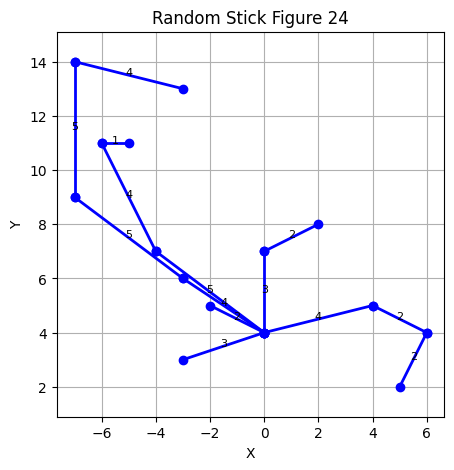

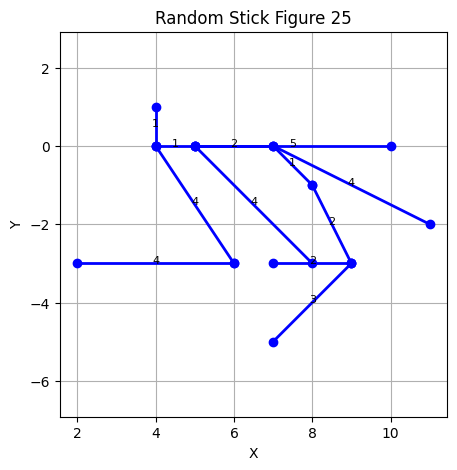

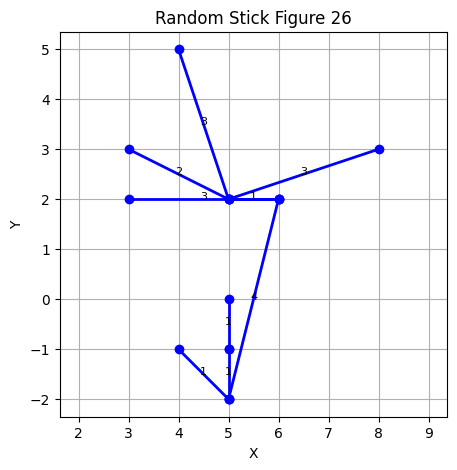

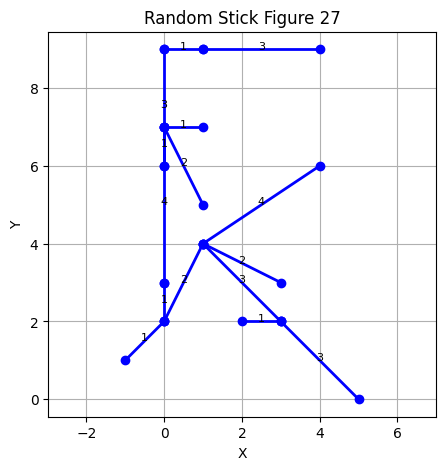

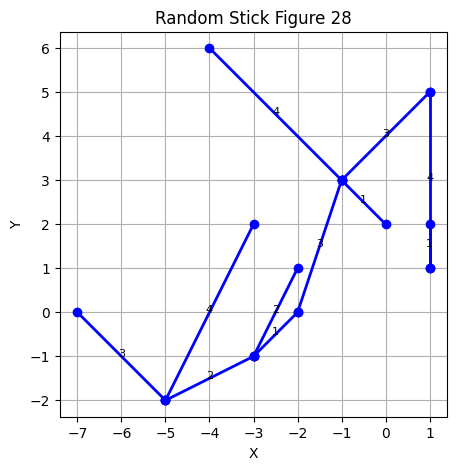

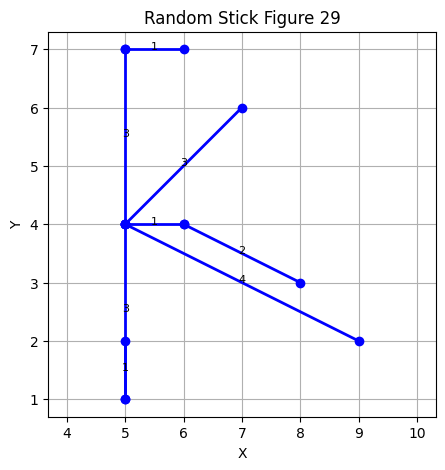

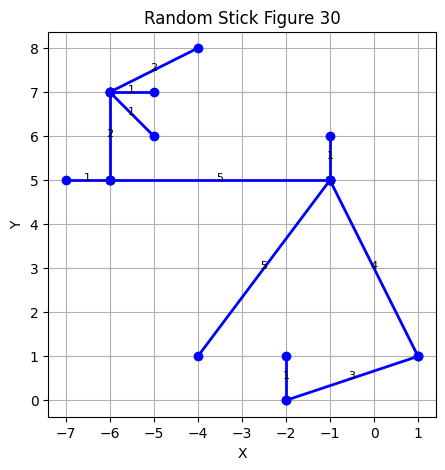

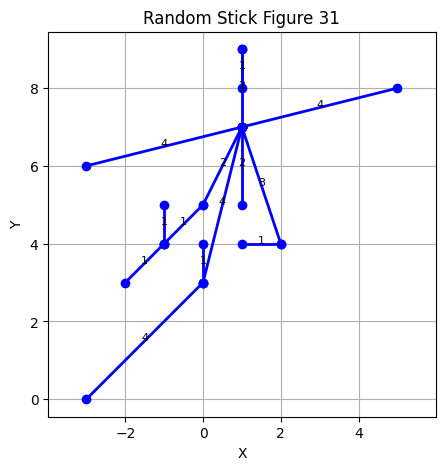

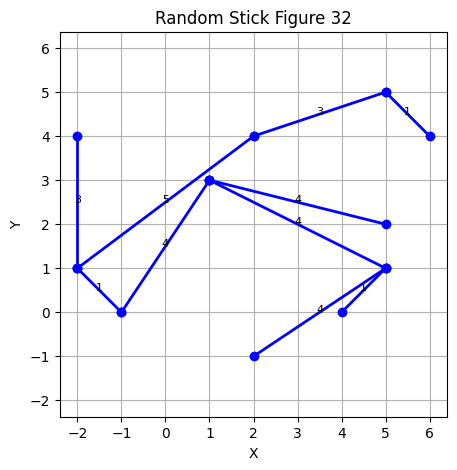

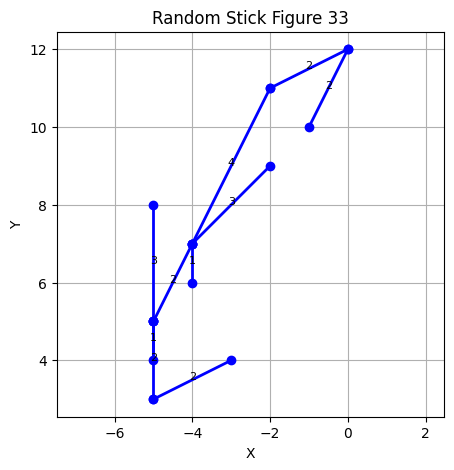

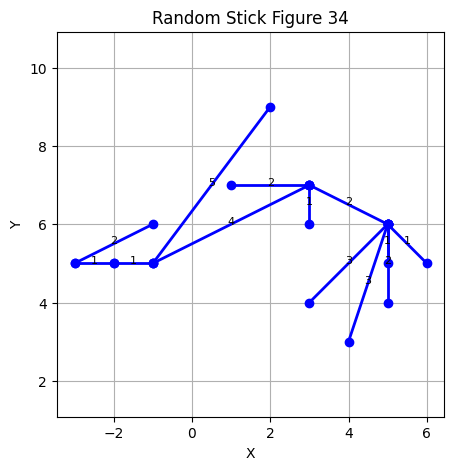

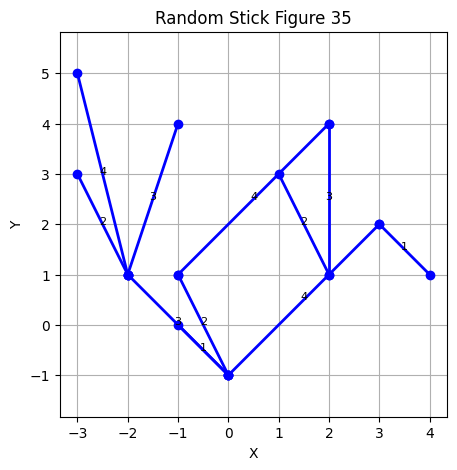

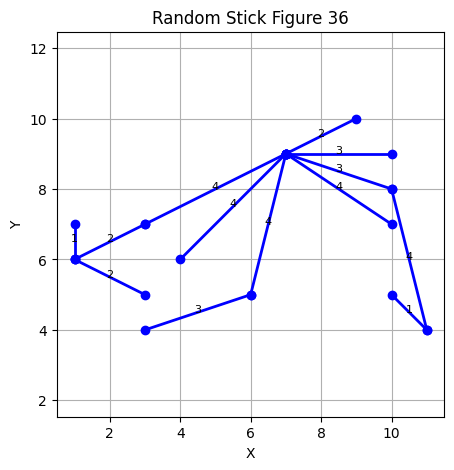

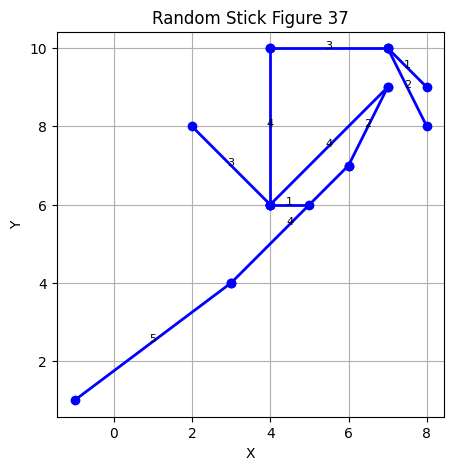

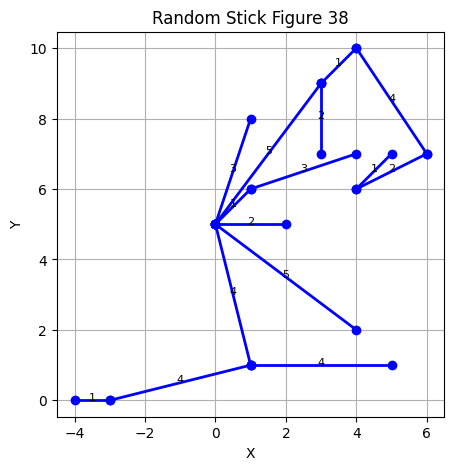

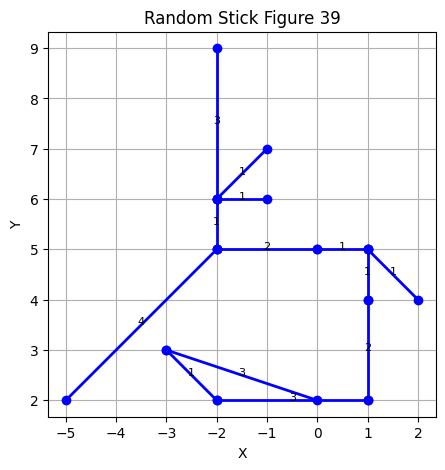

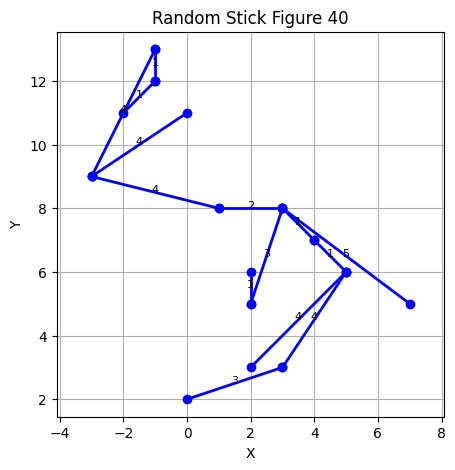

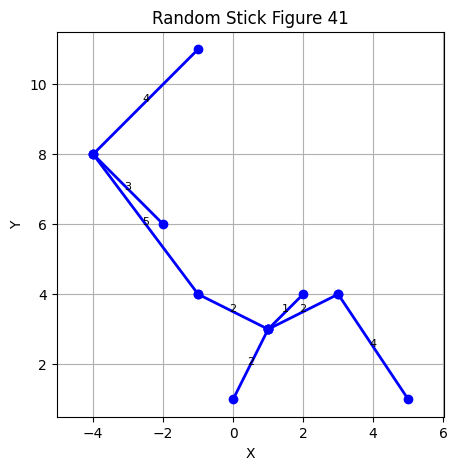

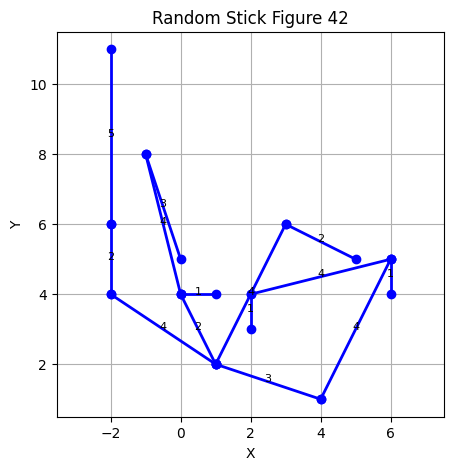

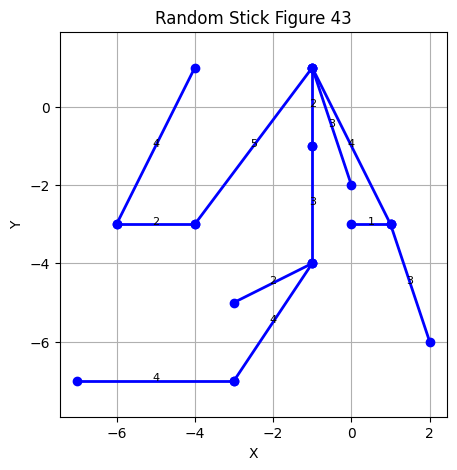

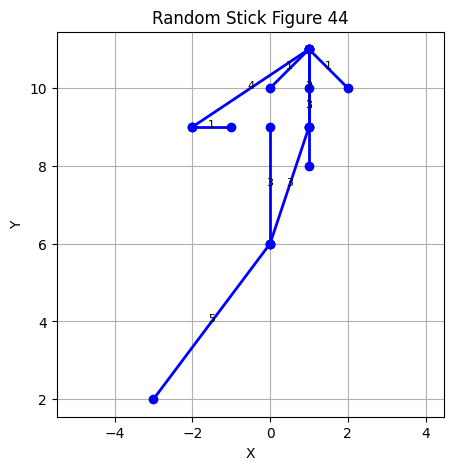

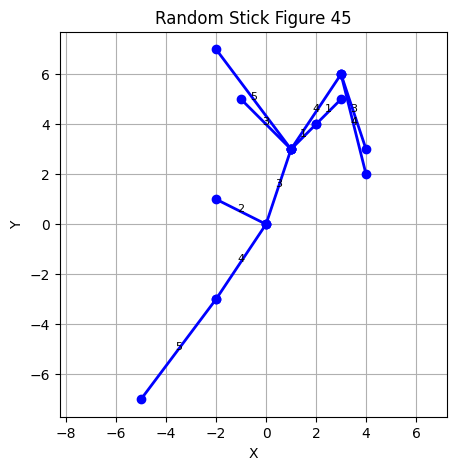

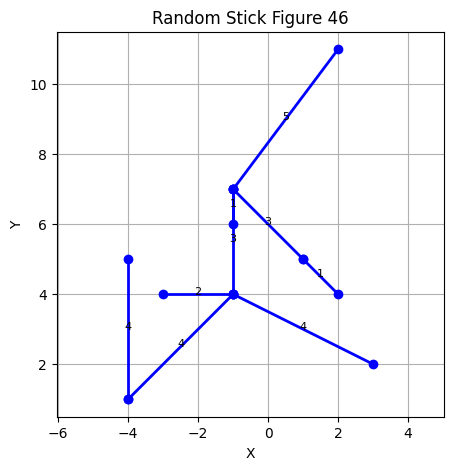

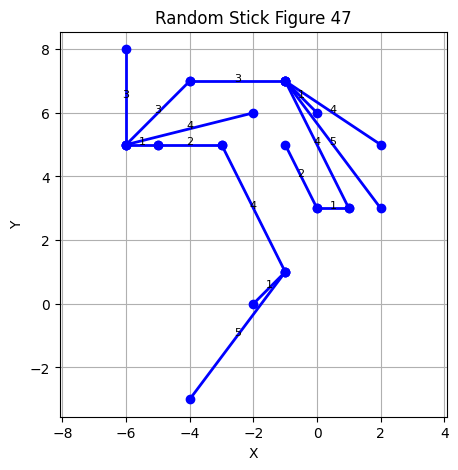

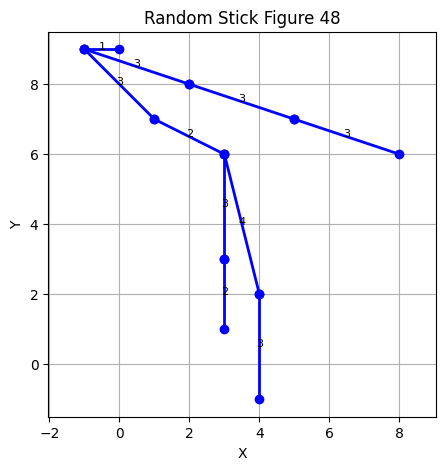

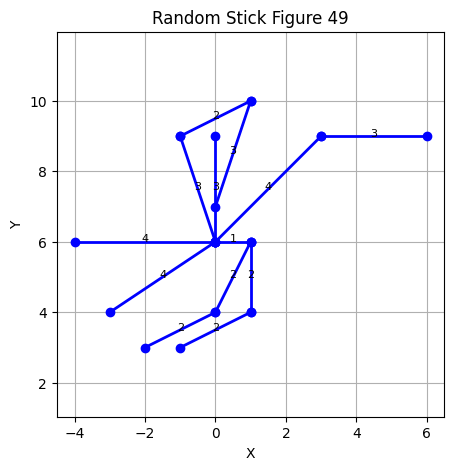

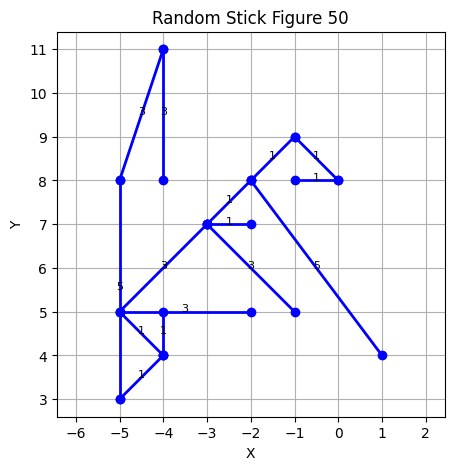

In [12]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point(x_range, y_range):
    return (random.uniform(*x_range), random.uniform(*y_range))

def calculate_distance(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

def is_valid_placement(new_point, points, min_distance=1):
    """Ensure that the new point does not overlap or come too close to existing points."""
    for point in points.values():
        if calculate_distance(new_point, point) < min_distance:
            return False
    return True

def do_lines_intersect(p1, p2, p3, p4):
    """Check if two lines (p1-p2 and p3-p4) intersect."""
    def ccw(A, B, C):
        return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

    return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

def is_valid_edge(new_edge, points, edges, min_edge_length=1, max_edge_length=5):
    """Ensure that the new edge does not intersect existing edges and adheres to edge length constraints."""
    if new_edge[0] not in points or new_edge[1] not in points:
        return False
    p1, p2 = points[new_edge[0]], points[new_edge[1]]
    edge_length = calculate_distance(p1, p2)
    if not (min_edge_length <= edge_length <= max_edge_length):
        return False
    for edge in edges:
        if do_lines_intersect(p1, p2, points[edge[0]], points[edge[1]]):
            return False
    return True

def generate_random_stick_figure(min_edge_length=1, max_edge_length=5):
    num_segments = random.randint(3, 6)
    num_limbs = random.randint(4, 12)

    points = {}
    edges = []

    x, y = 0, random.uniform(3, 5)
    for i in range(1, num_segments + 1):
        valid_placement = False
        attempts = 0
        while not valid_placement and attempts < 10:
            angle = random.uniform(0, 2 * math.pi)
            length = random.randint(min_edge_length, max_edge_length)
            candidate_x = round(x + length * math.cos(angle))
            candidate_y = round(y + length * math.sin(angle))
            if is_valid_placement((candidate_x, candidate_y), points):
                points[i] = (candidate_x, candidate_y)
                if i > 1:
                    new_edge = (i - 1, i)
                    if is_valid_edge(new_edge, points, edges, min_edge_length, max_edge_length):
                        edges.append(new_edge)
                        valid_placement = True
                    else:
                        if i in points:
                            del points[i]
                else:
                    valid_placement = True
            attempts += 1
        if i in points:
            x, y = points[i]

    if num_segments > 1:
        tail_tip = num_segments + 1
        valid_placement = False
        attempts = 0
        while not valid_placement and attempts < 10:
            angle = random.uniform(0, 2 * math.pi)
            length = random.randint(min_edge_length, max_edge_length)
            tail_point = (round(x + length * math.cos(angle)), round(y + length * math.sin(angle)))
            if is_valid_placement(tail_point, points) and is_valid_edge((num_segments, tail_tip), points, edges, min_edge_length, max_edge_length):
                points[tail_tip] = tail_point
                edges.append((num_segments, tail_tip))
                valid_placement = True
            attempts += 1

    for i in range(num_segments + 1, num_segments + 1 + num_limbs):
        valid_placement = False
        attempts = 0
        while not valid_placement and attempts < 10:
            attached_to = random.choice(list(points.keys()))  # randomly attach limbs to any body segment
            angle = random.uniform(0, 2 * math.pi)
            length = random.randint(min_edge_length, max_edge_length)  # whole number length
            limb_point = (round(points[attached_to][0] + length * math.cos(angle)), round(points[attached_to][1] + length * math.sin(angle)))
            new_edge = (attached_to, i)
            if is_valid_placement(limb_point, points):
                points[i] = limb_point
                if is_valid_edge(new_edge, points, edges, min_edge_length, max_edge_length):
                    edges.append(new_edge)
                    valid_placement = True
                else:
                    if i in points:
                        del points[i]  # only delete if the point was added
            attempts += 1

    return points, edges

def plot_stick_figure(points, edges, title='Random Stick Figure', index=1):
    plt.figure(figsize=(5, 5))
    for edge in edges:
        x_values = [points[edge[0]][0], points[edge[1]][0]]
        y_values = [points[edge[0]][1], points[edge[1]][1]]
        plt.plot(x_values, y_values, 'bo-', linewidth=2)
        # Display the length of each edge
        edge_length = calculate_distance(points[edge[0]], points[edge[1]])
        mid_x = (x_values[0] + x_values[1]) / 2
        mid_y = (y_values[0] + y_values[1]) / 2
        plt.text(mid_x, mid_y, f'{edge_length:.0f}', fontsize=8, ha='center')  # Display integer length

    plt.title(f'{title} {index}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

for i in range(1, 51):
    points, edges = generate_random_stick_figure(min_edge_length=1, max_edge_length=5)
    plot_stick_figure(points, edges, title='Random Stick Figure', index=i)
